In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
BASE_DIR = Path("../outputs/csv/wifi-research")
OUT_DIR = Path("../outputs/combine_analysis")
FIG_DIR = Path("../figures/wifi-research")

In [3]:
for d in [OUT_DIR, FIG_DIR]:
    d.mkdir(parents=True, exist_ok=True)

print(f"📂 Base data folder: {BASE_DIR.resolve()}")
print(f"📁 Combine analysis output: {OUT_DIR.resolve()}")
print(f"🖼️ Figures output folder: {FIG_DIR.resolve()}")

📂 Base data folder: E:\AIT_Projects\NS3-Project\outputs\csv\wifi-research
📁 Combine analysis output: E:\AIT_Projects\NS3-Project\outputs\combine_analysis
🖼️ Figures output folder: E:\AIT_Projects\NS3-Project\figures


In [27]:
meta_files = sorted(BASE_DIR.glob('research-meta-*.csv'))
perf_files = sorted(BASE_DIR.glob('wifi-research-*-perf.csv'))
rssi_files = sorted(BASE_DIR.glob('wifi-research-*-rssi.csv'))


if not meta_files:
    raise FileNotFoundError("No research-meta-*.csv found in wifi-research folder.")


meta_df = pd.concat([pd.read_csv(f) for f in meta_files], ignore_index=True)
meta_df.head(5)

,RunID,TxPower_dBm,NodeCount,AreaHalf,Indoor,Interference,Seed,Run,Throughput_Mbps,Latency_ms,Jitter_ms,Loss_pct
0,1,10,10,50,1,1,12345,1,0.0,0.0,0.0,100.0
1,2,10,10,50,1,1,12345,2,0.0,0.0,0.0,100.0
2,3,10,10,50,1,1,12345,3,0.0,0.0,0.0,100.0
3,4,10,20,50,1,1,12345,1,0.0,0.0,0.0,100.0
4,5,10,20,50,1,1,12345,2,0.0,0.0,0.0,100.0


In [28]:
perf_dfs = []
for f in perf_files:
    ts = f.stem.replace('wifi-research-', '').replace('-perf', '')
    df = pd.read_csv(f)
    df['Run_Timestamp'] = ts
    perf_dfs.append(df)
perf_df = pd.concat(perf_dfs, ignore_index=True)
print(f"Loaded {len(perf_files)} performance files.")
perf_df.head(5)

Loaded 48 performance files.


,FlowID,Source,Destination,Throughput(Mbps),Latency_ms,Jitter_ms,PacketLoss(%),Run_Timestamp
0,1,10.1.3.1,10.1.3.11,0.0,0.0,0.0,100.0,Tx10_N10_Run1_18-Oct-2025_15-33
1,2,10.1.3.2,10.1.3.11,0.0,0.0,0.0,100.0,Tx10_N10_Run1_18-Oct-2025_15-33
2,3,10.1.3.3,10.1.3.11,0.0,0.0,0.0,100.0,Tx10_N10_Run1_18-Oct-2025_15-33
3,4,10.1.3.4,10.1.3.11,0.0,0.0,0.0,100.0,Tx10_N10_Run1_18-Oct-2025_15-33
4,5,10.1.3.5,10.1.3.11,0.0,0.0,0.0,100.0,Tx10_N10_Run1_18-Oct-2025_15-33


In [29]:
rssi_dfs = []
for f in rssi_files:
    ts = f.stem.replace('wifi-research-', '').replace('-rssi', '')
    df = pd.read_csv(f)
    df['Run_Timestamp'] = ts
    rssi_dfs.append(df)
rssi_df = pd.concat(rssi_dfs, ignore_index=True)
print(f"Loaded {len(rssi_files)} RSSI files.")
rssi_df.head(5)

Loaded 48 RSSI files.


C:\Users\satna\AppData\Local\Temp\ipykernel_20788\799810561.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rssi_df = pd.concat(rssi_dfs, ignore_index=True)


,time_s,channel_MHz,signal_dBm,noise_dBm,Run_Timestamp
0,1.652891,5210,-81.456519,-93.965985,Tx10_N30_Run1_18-Oct-2025_15-33
1,1.681068,5210,-80.043240,-93.965985,Tx10_N30_Run1_18-Oct-2025_15-33
2,1.857691,5210,-79.763409,-93.965985,Tx10_N30_Run1_18-Oct-2025_15-33
3,1.960091,5210,-80.426525,-93.965985,Tx10_N30_Run1_18-Oct-2025_15-33
4,2.164891,5210,-79.061227,-93.965985,Tx10_N30_Run1_18-Oct-2025_15-33


In [30]:
perf_summary = perf_df.groupby('Run_Timestamp').mean(numeric_only=True).reset_index()
perf_summary.head(5)

,Run_Timestamp,FlowID,Throughput(Mbps),Latency_ms,Jitter_ms,PacketLoss(%)
0,Tx10_N10_Run1_18-Oct-2025_15-33,5.5,0.0,0.0,0.0,100.0
1,Tx10_N10_Run2_18-Oct-2025_15-33,5.5,0.0,0.0,0.0,100.0
2,Tx10_N10_Run3_18-Oct-2025_15-33,5.5,0.0,0.0,0.0,100.0
3,Tx10_N20_Run1_18-Oct-2025_15-33,10.5,0.0,0.0,0.0,100.0
4,Tx10_N20_Run2_18-Oct-2025_15-33,10.5,0.0,0.0,0.0,100.0


In [31]:
rssi_summary = rssi_df.groupby('Run_Timestamp').mean(numeric_only=True).reset_index()
rssi_summary.head(5)

,Run_Timestamp,time_s,signal_dBm,noise_dBm
0,Tx10_N30_Run1_18-Oct-2025_15-33,10.945951,-80.377709,-91.889916
1,Tx14_N10_Run1_18-Oct-2025_15-33,27.143470,-78.385199,-88.554025
2,Tx14_N20_Run1_18-Oct-2025_15-33,27.331134,-78.150397,-88.216805
3,Tx14_N30_Run1_18-Oct-2025_15-33,26.147920,-78.519068,-88.681948
4,Tx18_N10_Run1_18-Oct-2025_15-33,7.403773,-76.698658,-88.516683


In [11]:
# Merge perf + rssi by timestamp
combined = pd.merge(perf_summary, rssi_summary, on='Run_Timestamp', how='inner')

# Prepare metadata for merging
# Keep only distinct parameter combinations to avoid duplication
meta_clean = meta_df[['TxPower_dBm', 'NodeCount', 'Run', 'AreaHalf',
                      'Indoor', 'Interference', 'Seed']].drop_duplicates()

# Extract parameter hints from timestamp (optional backup)
# e.g. Run_Timestamp = 'Tx10_N10_Run2_16-Oct-2025_22-30'
def parse_tag(tag):
    out = {}
    parts = tag.split('_')
    for p in parts:
        if p.startswith('Tx'):
            out['TxPower_dBm'] = float(p[2:])
        elif p.startswith('N'):
            out['NodeCount'] = int(p[1:])
        elif p.startswith('Run'):
            out['Run'] = int(p[3:])
    return out

params_df = pd.DataFrame([parse_tag(ts) for ts in combined['Run_Timestamp']])
combined = pd.concat([combined, params_df], axis=1)

# Merge with metadata
combined = pd.merge(combined, meta_clean, on=['TxPower_dBm','NodeCount','Run'], how='left')

# Save the final combined dataset
combined.to_csv(OUT_DIR / 'wifi-research-combined-dataset.csv', index=False)
print(f"Combined dataset saved to: {OUT_DIR / 'wifi-research-combined-dataset.csv'}")


Combined dataset saved to: ..\outputs\combine_analysis\wifi-research-combined-dataset.csv


In [12]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
'font.family': 'serif',
'axes.edgecolor': 'black',
'axes.linewidth': 0.8,
'grid.alpha': 0.4,
'figure.dpi': 150,
'savefig.dpi': 300
})

In [32]:
# =============================
# 4. Summary and Correlations
# =============================

# --- Normalize column names ---
combined.columns = (
    combined.columns.str.replace(r"\(.*\)", "", regex=True)   # remove (Mbps) etc.
                       .str.replace(" ", "_")
                       .str.replace("%", "pct")
                       .str.strip()
)

# Harmonize column naming to standard expected keys
rename_map = {
    "Throughput": "Throughput_Mbps",
    "Latency_avg": "Latency_ms",
    "Latency": "Latency_ms",
    "Jitter_avg": "Jitter_ms",
    "Jitter": "Jitter_ms",
    "PacketLoss": "Loss_pct",
    "PacketLoss_pct": "Loss_pct",
    "signal_dBm": "signal_dBm",
    "noise_dBm": "noise_dBm"
}
combined = combined.rename(columns={k: v for k, v in rename_map.items() if k in combined.columns})

# --- Build summary dataframe safely ---
expected_cols = [
    "TxPower_dBm","NodeCount",
    "Throughput_Mbps","Latency_ms","Jitter_ms","Loss_pct",
    "signal_dBm","noise_dBm"
]
available_cols = [c for c in expected_cols if c in combined.columns]

if not available_cols:
    raise ValueError("No matching metric columns found after renaming. Check combined.columns.")

summary = combined[available_cols].copy()

print("✅ Summary DataFrame ready. Columns:")
print(summary.columns.tolist())

# --- Compute correlation ---
corr = summary.corr(numeric_only=True)
corr_path = OUT_DIR / "wifi-research-correlation.csv"
corr.to_csv(corr_path)
print(f"Correlation matrix saved: {corr_path}")
corr.head(5)


✅ Summary DataFrame ready. Columns:
['TxPower_dBm', 'NodeCount', 'Throughput_Mbps', 'Latency_ms', 'Jitter_ms', 'Loss_pct', 'signal_dBm', 'noise_dBm']
Correlation matrix saved: ..\outputs\combine_analysis\wifi-research-correlation.csv


,TxPower_dBm,NodeCount,Throughput_Mbps,Latency_ms,Jitter_ms,Loss_pct,signal_dBm,noise_dBm
TxPower_dBm,1.000000,-0.065653,0.437473,0.165323,0.367476,-0.136291,0.968012,0.619669
NodeCount,-0.065653,1.000000,-0.686736,-0.252795,-0.748969,0.905143,-0.257411,-0.432036
Throughput_Mbps,0.437473,-0.686736,1.000000,0.563039,0.795388,-0.669063,0.580169,0.378086
Latency_ms,0.165323,-0.252795,0.563039,1.000000,0.782497,-0.291683,0.281593,0.370763
Jitter_ms,0.367476,-0.748969,0.795388,0.782497,1.000000,-0.705215,0.531622,0.617494


In [17]:
def save_fig(name):
    plt.tight_layout()
    plt.savefig(FIG_DIR / name, bbox_inches='tight')
    print(f"Saved figure: {FIG_DIR / name}")

Saved figure: ..\figures\wifi-research-throughput_vs_txpower.png


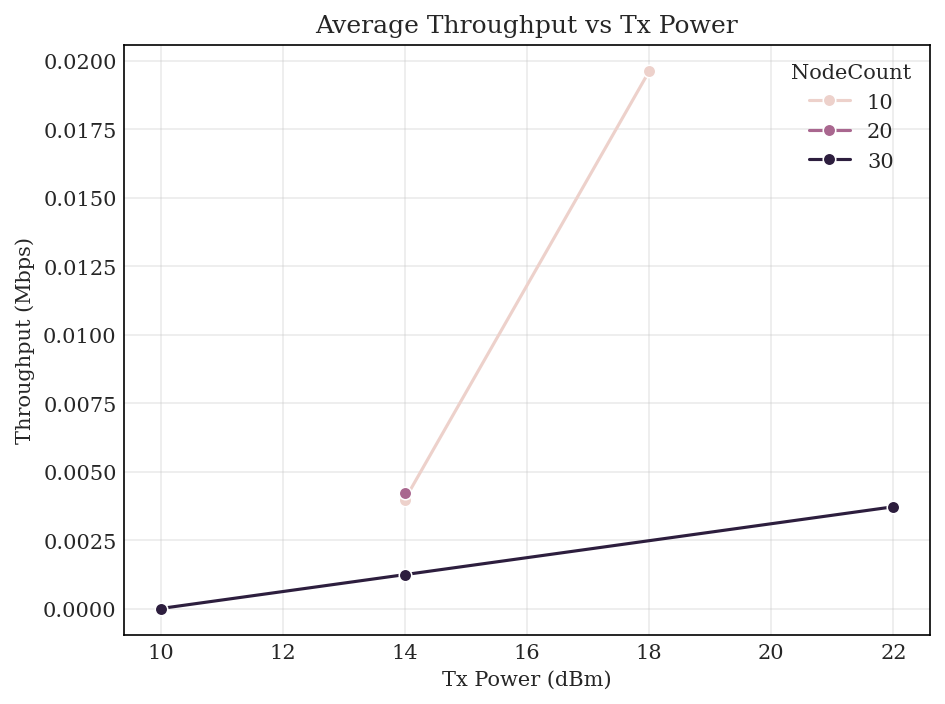

In [21]:
# Throughput vs TxPower
sns.lineplot(data=summary, x='TxPower_dBm', y='Throughput_Mbps', hue='NodeCount', marker='o')
plt.title('Average Throughput vs Tx Power')
plt.xlabel('Tx Power (dBm)')
plt.ylabel('Throughput (Mbps)')
save_fig('wifi-research-throughput_vs_txpower.png')
plt.show()

Saved figure: ..\figures\wifi-research-latency_vs_nodes.png


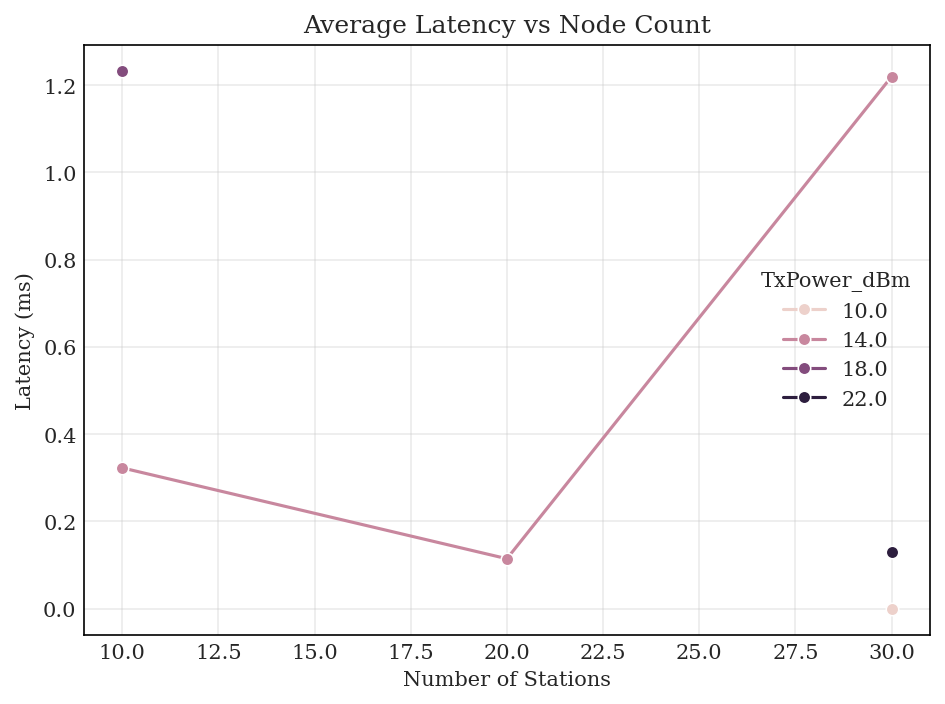

In [22]:
sns.lineplot(data=summary, x='NodeCount', y='Latency_ms', hue='TxPower_dBm', marker='o')
plt.title('Average Latency vs Node Count')
plt.xlabel('Number of Stations')
plt.ylabel('Latency (ms)')
save_fig('wifi-research-latency_vs_nodes.png')
plt.show()

Saved figure: ..\figures\wifi-research-rssi_vs_throughput.png


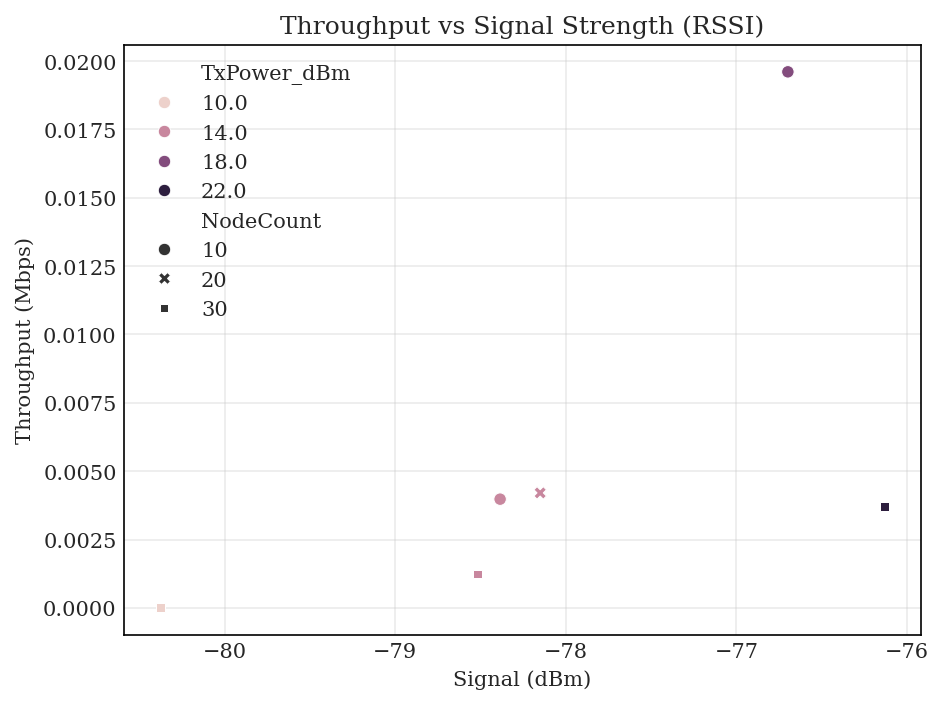

In [23]:
sns.scatterplot(data=summary, x='signal_dBm', y='Throughput_Mbps', hue='TxPower_dBm', style='NodeCount')
plt.title('Throughput vs Signal Strength (RSSI)')
plt.xlabel('Signal (dBm)')
plt.ylabel('Throughput (Mbps)')
save_fig('wifi-research-rssi_vs_throughput.png')
plt.show()


C:\Users\satna\AppData\Local\Temp\ipykernel_20788\4130891624.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(


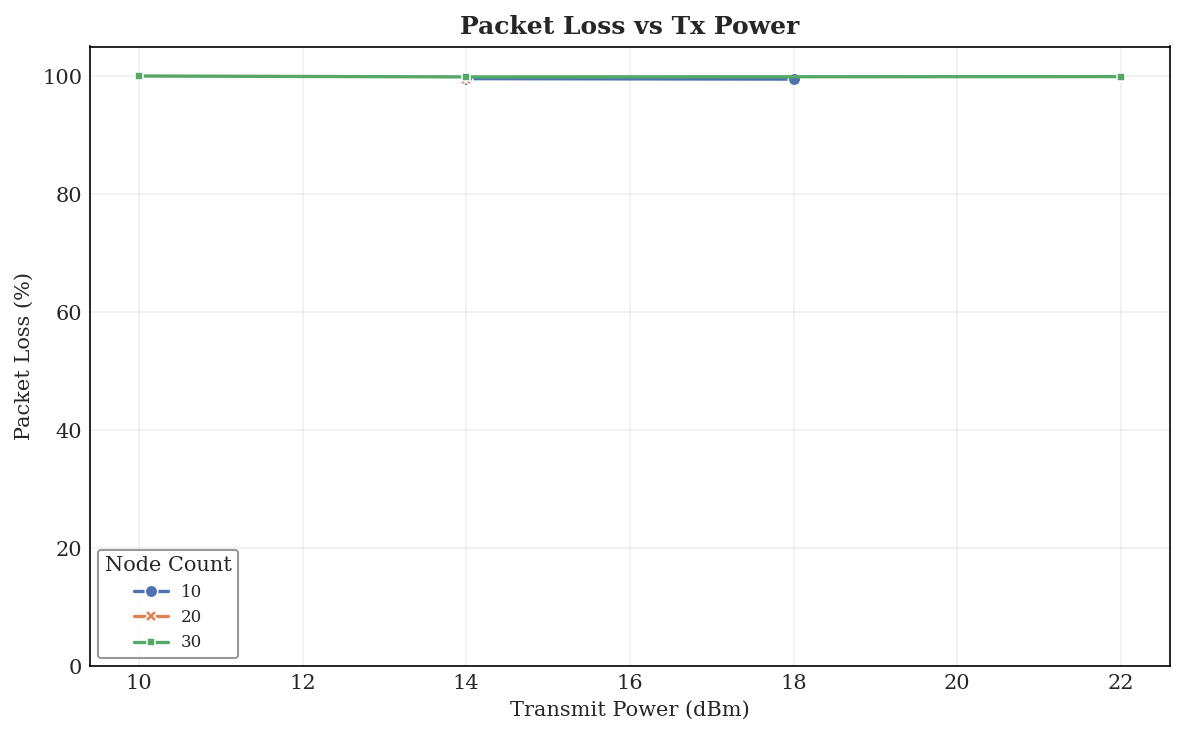

In [33]:
# --- Improved Packet Loss Visualization ---
plt.figure(figsize=(8,5))
palette = sns.color_palette("deep")

sns.lineplot(
    data=summary,
    x="TxPower_dBm",
    y="Loss_pct",
    hue="NodeCount",
    style="NodeCount",
    markers=True,
    dashes=False,
    linewidth=1.6,
    palette=palette
)

plt.title("Packet Loss vs Tx Power", fontsize=12, weight='bold')
plt.xlabel("Transmit Power (dBm)")
plt.ylabel("Packet Loss (%)")
plt.ylim(0, 105)
plt.grid(True, alpha=0.3)
plt.legend(title="Node Count", frameon=True, edgecolor="gray", fontsize=8)
plt.tight_layout()
plt.savefig(FIG_DIR / "wifi-research-loss_vs_txpower.png", bbox_inches="tight")
plt.show()



Saved figure: ..\figures\wifi-research-correlation_heatmap.png


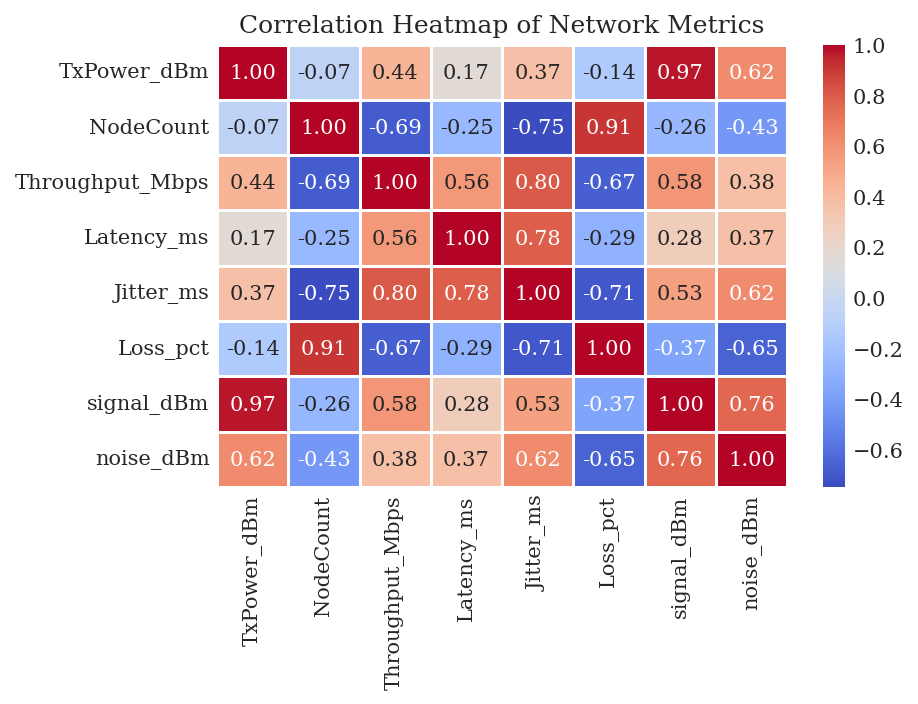

In [34]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Network Metrics')
save_fig('wifi-research-correlation_heatmap.png')
plt.show()

Saved figure: ..\figures\wifi-research-3d_trend.png


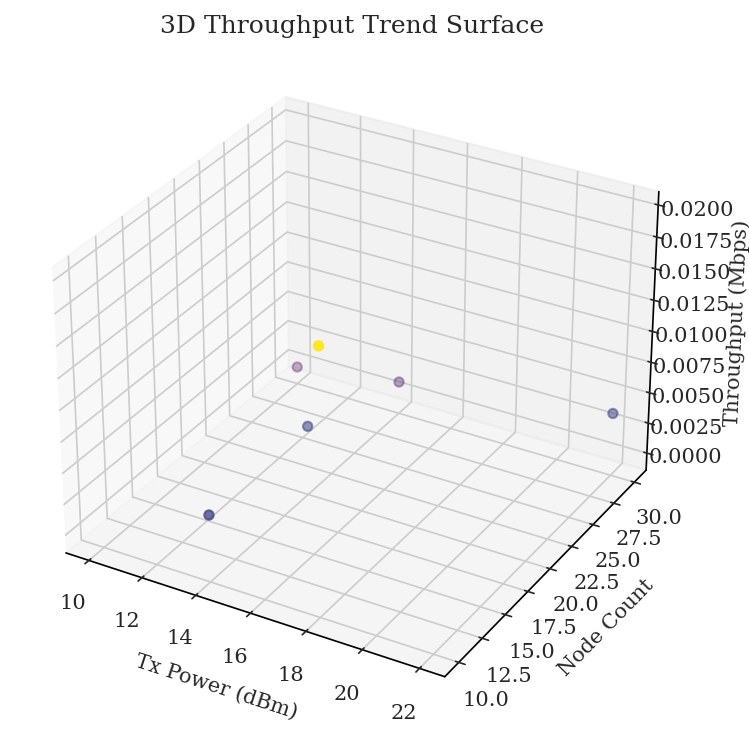

In [26]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(summary['TxPower_dBm'], summary['NodeCount'], summary['Throughput_Mbps'], c=summary['Throughput_Mbps'], cmap='viridis')
ax.set_xlabel('Tx Power (dBm)')
ax.set_ylabel('Node Count')
ax.set_zlabel('Throughput (Mbps)')
ax.set_title('3D Throughput Trend Surface')
save_fig('wifi-research-3d_trend.png')
plt.show()

📊 Selected run with most time samples: Tx14_N20_Run1_18-Oct-2025_15-33
✅ Saved: ..\figures\wifi-research-throughput_time-Tx14_N20_Run1_18-Oct-2025_15-33.png


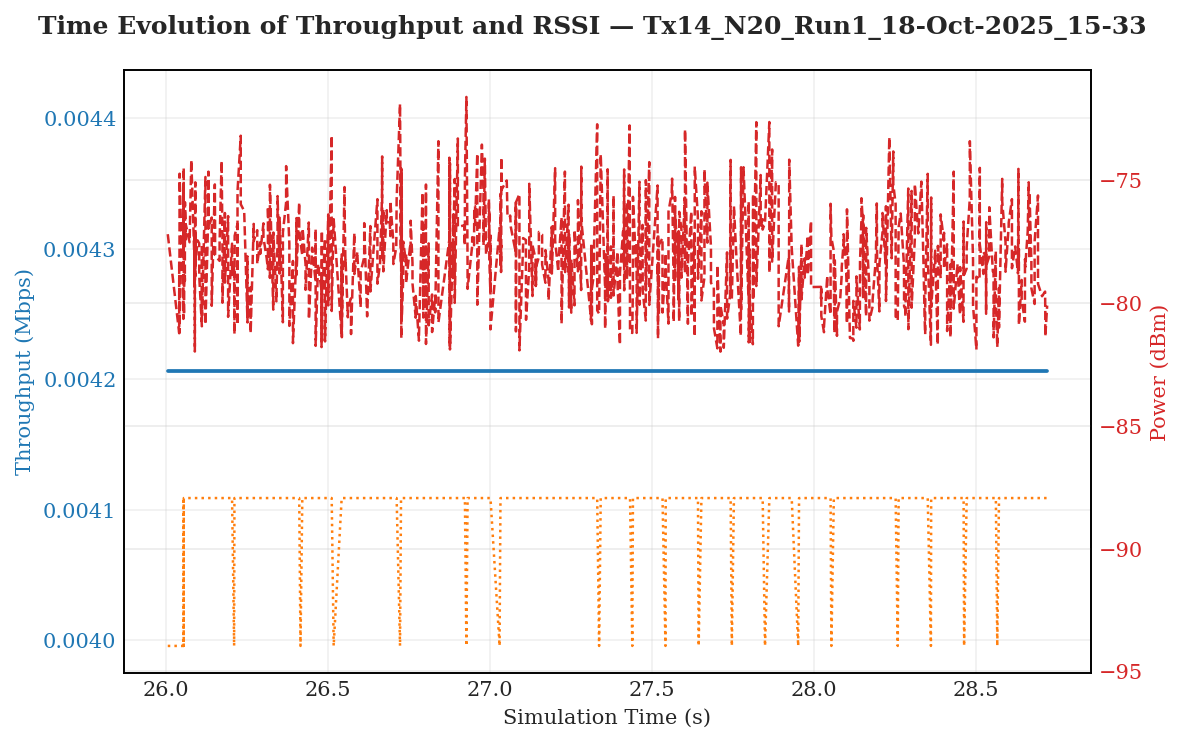

In [36]:
# --- Time-based Performance Visualization (auto-select richest run) ---
import matplotlib.dates as mdates

if 'time_s' in rssi_df.columns:
    # Count data points per run to find the most data-rich
    run_counts = rssi_df.groupby('Run_Timestamp')['time_s'].count().reset_index(name='count')
    best_run = run_counts.sort_values('count', ascending=False).iloc[0]['Run_Timestamp']
    print(f"📊 Selected run with most time samples: {best_run}")

    # Average RSSI/noise over time
    timeline = rssi_df[rssi_df['Run_Timestamp'] == best_run].groupby('time_s')[['signal_dBm','noise_dBm']].mean().reset_index()

    # Approximate throughput timeline (if detailed timestamps unavailable)
    if 'Throughput_Mbps' in perf_df.columns:
        thr_value = perf_df[perf_df['Run_Timestamp'] == best_run]['Throughput_Mbps'].mean()
        timeline['Throughput_Mbps'] = thr_value
    else:
        # fallback using combined averages
        thr_value = combined.loc[combined['Run_Timestamp'] == best_run, 'Throughput_Mbps'].mean()
        timeline['Throughput_Mbps'] = thr_value

    # Plot throughput & RSSI vs time
    fig, ax1 = plt.subplots(figsize=(8,5))
    ax1.plot(timeline['time_s'], timeline['Throughput_Mbps'],
             color='tab:blue', linewidth=1.8, label='Throughput (Mbps)')
    ax1.set_xlabel('Simulation Time (s)')
    ax1.set_ylabel('Throughput (Mbps)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(timeline['time_s'], timeline['signal_dBm'], color='tab:red', linestyle='--', linewidth=1.2, label='Signal (dBm)')
    ax2.plot(timeline['time_s'], timeline['noise_dBm'], color='tab:orange', linestyle=':', linewidth=1.2, label='Noise (dBm)')
    ax2.set_ylabel('Power (dBm)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.suptitle(f'Time Evolution of Throughput and RSSI — {best_run}', fontsize=12, weight='bold')
    ax1.grid(alpha=0.3)
    fig.tight_layout()

    save_path = FIG_DIR / f"wifi-research-throughput_time-{best_run}.png"
    fig.savefig(save_path, bbox_inches='tight')
    print(f"✅ Saved: {save_path}")
    plt.show()

else:
    print("⚠️ No time_s column found in RSSI data. Cannot plot time evolution.")


In [19]:
print("\n=== Statistical Insights ===")
print("Correlation matrix summary:\n", corr.round(2))
print("\nTop influencing factors on throughput:")
print(corr['Throughput_Mbps'].sort_values(ascending=False))

summary_stats = summary.groupby(['TxPower_dBm','NodeCount']).agg(['mean','std']).reset_index()
summary_stats.to_csv(OUT_DIR / 'wifi-research-summary.csv', index=False)
print(f"✅ Summary statistics exported: {OUT_DIR / 'wifi-research-summary.csv'}")

print("\nAll figures and combined datasets saved successfully.")


=== Statistical Insights ===
Correlation matrix summary:
                  TxPower_dBm  NodeCount  Throughput_Mbps  Latency_ms  \
TxPower_dBm             1.00      -0.07             0.44        0.17   
NodeCount              -0.07       1.00            -0.69       -0.25   
Throughput_Mbps         0.44      -0.69             1.00        0.56   
Latency_ms              0.17      -0.25             0.56        1.00   
Jitter_ms               0.37      -0.75             0.80        0.78   
Loss_pct               -0.14       0.91            -0.67       -0.29   
signal_dBm              0.97      -0.26             0.58        0.28   
noise_dBm               0.62      -0.43             0.38        0.37   

                 Jitter_ms  Loss_pct  signal_dBm  noise_dBm  
TxPower_dBm           0.37     -0.14        0.97       0.62  
NodeCount            -0.75      0.91       -0.26      -0.43  
Throughput_Mbps       0.80     -0.67        0.58       0.38  
Latency_ms            0.78     -0.29        